# Temperature Trends in the Indian Subcontinent: Analyzing ERA5 data from 2014 to 2023

## Introduction

Researchers developed climate models to investigate and understand the past and present climate and to project the future climate. However, such experiments generate vast amounts of data from climate models, which also necessitated the development of advanced analysis tools. Python libraries like xarray and R packages like ncdf4 and raster have emerged as powerful tools for working with climate data. Additionally, command-line tools like CDO and NCO, as well as the graphical interface of GrADS, offer versatile options for data manipulation and visualization. 

I have vast experience working with CDO and GrADS for climate data analysis; however, those software programs are becoming obsolete. Meanwhile, Python and R are setting the future of programming in Climate Science due to their powerful libraries for analysis and ease of use.

This mini-project is one of many to demonstrate the application and showcase my skills in Python. 

Focus of Analysis

I will:

1. Explore ERA5 data: Import the NetCDF dataset and examine its structure and variables.
2. Extract temperature data: Select the temperature variable and extract its values for the desired time period and region.
3. Calculate anomalies: Determine the deviation of temperature from the long-term average.
4. Create visualizations: Generate bar charts and spatial plots to illustrate temperature trends and anomalies.

## Pre-requisites for Data Analysis

### Python Libraries

In [1]:
# imports
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Data

ERA5 reanalysis data is downloaded from the Copernicus Climate Data Store. Monthly data on 2-meter air temperature and specific humidity for the Subcontinent from January 2014 to December 2023 are selected for analysis. In this project, the analysis will focus on the entire Subcontinent; however, in the next project, I will particularly focus on India. The technical description of the data is as follows.

**Dimensions:**

> Longitude: 65.0°E to 100.0°E, with a resolution of 0.25°.
> Latitude: 40.0°N to 5.0°N, with a resolution of 0.25°.
> Time: Monthly data from January 2014 to December 2023.

**Data Variables:**

> t2m (2-meter air temperature) and sp (Specific humidity): Both variables are provided on a regular grid of latitude, longitude, and time, with data in float64 format.

First, we will load the downloaded data and extract some useful information on coordinates, variables, and some basic data conversions.

#### Loading Dataset


In [2]:
# Load the dataset
file_path = 'C:/Users/Saurabh Kelkar/Documents/Python/climate-data-analysis-python/era5_data_IND.nc'
ds = xr.open_dataset(file_path)

# Explore the dataset structure
print(ds)

<xarray.Dataset> Size: 38MB
Dimensions:    (longitude: 141, latitude: 141, time: 120)
Coordinates:
  * longitude  (longitude) float32 564B 65.0 65.25 65.5 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 564B 40.0 39.75 39.5 39.25 ... 5.5 5.25 5.0
  * time       (time) datetime64[ns] 960B 2014-01-01 2014-02-01 ... 2023-12-01
Data variables:
    t2m        (time, latitude, longitude) float64 19MB ...
    sp         (time, latitude, longitude) float64 19MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-09-19 08:42:57 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


The code loads the ERA5 reanalysis dataset for the Indian Subcontinent using `xarray`. The dataset is stored in a NetCDF file, and the `open_dataset` function reads its contents into a `xarray` object named `ds`. Printing `ds` obtains a summary of the dataset's structure, including its dimensions, variables, and attributes.

#### Mapping and Extracting elements of the data

Now that the data is loaded, let's see how we can extract some information. Though directly printing the data using `print(ds)` will display the data structure, it is essential to know how to extract specific information.

In [3]:
# Mapping coordinate names to values
ds.coords

Coordinates:
  * longitude  (longitude) float32 564B 65.0 65.25 65.5 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 564B 40.0 39.75 39.5 39.25 ... 5.5 5.25 5.0
  * time       (time) datetime64[ns] 960B 2014-01-01 2014-02-01 ... 2023-12-01

The `ds.coords` attribute in `xarray` provides a dictionary-like view of the coordinate variables associated with the Dataset object. It allows access to and manipulation of the coordinate variables (e.g., latitude, longitude, and time) that define the spatial and temporal dimensions of the data. This information is essential when preparing to subset or plot the data based on its spatial or temporal dimensions.

In [4]:
# Extracting attributes of the dataset
ds.attrs

{'Conventions': 'CF-1.6',
 'history': '2024-09-19 08:42:57 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data7/adaptor.mars.internal-1726735377.3668237-12445-16-0c5dab26-a16d-45c2-827f-ffca2f586c44.nc /cache/tmp/0c5dab26-a16d-45c2-827f-ffca2f586c44-adaptor.mars.internal-1726735353.4124968-12445-2-tmp.grib'}

The `.attrs` attribute in xarray shows the global attributes associated with the Dataset object. These global attributes are metadata that describe the entire dataset rather than individual variables.

In [5]:
# Extracting attributes of the variable
ds.t2m.attrs

{'units': 'K', 'long_name': '2 metre temperature'}

On the other hand, `.t2m.attrs` will show the attributes associated with the temperature variable itself.

While looking at code chunks so far, you will notice `.`. It is the dot operator used to access attributes or methods of an object. The dot operator is central to object-oriented programming in Python, allowing for direct interaction with an object’s attributes and methods, a practice we leverage heavily in this analysis. In other words, it's a way to interact with the data object. Very convenient!
Another way is to use square brackets `[ ]` to access the Dataset properties, such as `ds['attrs']` or `ds['coords']`.

#### Conversions of Data Structures

When working with gridded datasets (like those stored in NetCDF format), it's often beneficial to convert specific variables into more familiar data structures like Series or DataFrames. This allows you to leverage the powerful tools and functions provided by libraries such as NumPy, Pandas, and Seaborn for data manipulation, analysis, and visualization.

*to_series()* method converts a DataArray (which represents a single variable from the dataset) into a Pandas series object that combines the dimensions of the DataArray (e.g., time, latitude, longitude).
For example,

In [6]:
# Extract temperature and convert it into a series.
ds.t2m.to_series()

time        latitude  longitude
2014-01-01  40.0      65.00        275.888111
                      65.25        276.115565
                      65.50        275.878270
                      65.75        275.273550
                      66.00        274.938931
                                      ...    
2023-12-01  5.0       99.00        300.637883
                      99.25        300.663034
                      99.50        300.668502
                      99.75        300.722085
                      100.00       300.575552
Name: t2m, Length: 2385720, dtype: float64

Another method is *to_dataframe()*. It converts a DataArray into a Pandas DataFrame with columns representing the dimensions of the DataArray and a single column containing the variable's values.

In [7]:
# Extract temperature and convert it into a data frame.
ds.t2m.to_dataframe()

t2m
time       latitude longitude            
2014-01-01 40.0     65.00      275.888111
                    65.25      276.115565
                    65.50      275.878270
                    65.75      275.273550
                    66.00      274.938931
...                                   ...
2023-12-01 5.0      99.00      300.637883
                    99.25      300.663034
                    99.50      300.668502
                    99.75      300.722085
                    100.00     300.575552

[2385720 rows x 1 columns]

A `Series` is useful for simpler time-series operations, while a `DataFrame` allows for more flexible multi-dimensional analysis. Converting the data into either of the formats enables the application of sophisticated data manipulation and plotting techniques, which are not directly supported by the xarray object.

This covers the basics of converting the data structure. In the following sections, I will apply the functions discussed so far to compute temperature anomalies, trends, and create visualizations.

## Data Processing and Computations

Python has versatile and powerful computational abilities. With Python's intuitive syntax and extensive libraries, handling large datasets and performing calculations is a piece of cake. Its dynamic typing and interpreted nature make it easy to experiment and iterate on code quickly. Additionally, Python supports advanced computations, including multidimensional data analysis, statistical programming, and optimization, making it a popular choice.

Here, I will process temperature data from ERA5, calculating mean and anomalies and performing time-series decomposition to analyze the temperature trend. At the same time, I will visualize the processed/computed data.


#### ERA5 - Temperature Data

The temperature variable, `t2m`, is represented in Kelvin. I will convert it to Celcius by subtracting 273.15 from the temperature values.

In [8]:
# Extracting 2m Air Temperature
temp = ds.t2m

# Converting temperature from Kelvin to Celcius.
temp_C = temp - 273.15

# Computing annual mean temperature from monthly data
temp_C_amean = temp_C.resample(time='YE').mean()

# Computing area average of annual mean temperature. This will give a timeseries data for the entire Subcontinent.
t2m_annual_amean = temp_C_amean.mean(dim=['latitude', 'longitude'])

The `temp_C.resample(time='YE').mean()` calculates the annual mean temperature for each grid point. The resample function groups the data by year (using the YE frequency), and then the mean function is applied to calculate the average temperature for each year. The resulting `temp_C_amean` object is a DataArray with the same spatial dimensions as `temp_C` but with a reduced temporal dimension representing the annual average values. Essentially, I converted the Monthly data to Yearly data by keeping other dimensions intact.

However, if we want to investigate the timeseries of the temperature of the entire region, then gridded data needs to be area averaged. The final step of the above code chunk does just that. The mean function in `temp_C_amean.mean(dim=['latitude', 'longitude'])` is applied along the latitude and longitude dimensions, effectively averaging the temperature values across all grid points.

Now, `t2m_annual_amean` contains timeseries of annual mean 2m temperature from 2014-2023, and now represents a single value per year, representing the temperature across the country.

Let's visualize it.

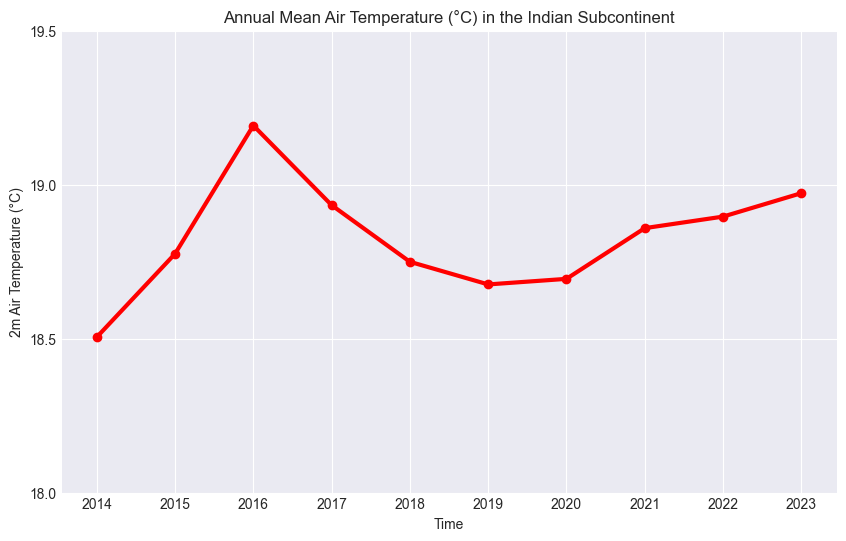

In [9]:
# Setting figure dimensions width x height
plt.figure(figsize=(10, 6))

# Use a predefined theme
plt.style.use('seaborn-v0_8-darkgrid')

# Setting axis ticks.
yticks = np.arange(18, 19.6, 0.5)  # Set ticks from 60 to 80 with an increment of 2
xticks = np.arange(2014, 2024, 1)  # Set ticks from 2014 to 2024 with an increment of 1

# Line plot
plt.plot(t2m_annual_amean['time'].dt.year, t2m_annual_amean, color='red', lw=3, marker='o', markersize=6)
plt.ylim(18, 19.5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Annual Mean Air Temperature (°C) in the Indian Subcontinent')
plt.xlabel('Time')
plt.ylabel('2m Air Temperature (°C)')

plt.savefig('t2m_lineplot.png')
plt.show()

The figure indicates that 2016 was the warmest year in the Subcontinent during the study period, followed by 2023. We can validate it from official reports from the Indian Meteorological Department (IMD), the Weather Channel, and other media agencies. The IMD noted that the five warmest years in recorded history have all occurred within the last 14 years, indicating a troubling trend of increasing temperatures and changing weather patterns (1, 2, 3).
While temperature trends show long-term warming, temperature anomalies provide further insight by highlighting deviations from the long-term climatological average, giving a clearer picture of extreme or unusual temperature patterns. Let's look at them now.

#### Temperature Anomaly

I will calculate monthly anomalies using monthly mean temperature for the decade 2014-2023. For the purpose of this assignment, I will calculate the climatological mean for each month across years instead of using the total area-averaged mean value. The reason is that the Subcontinent is large, and the spatial variation in temperatures is significant, so incorporating the total mean may misrepresent anomaly estimations. I also considered the monthly climatological mean for the same reason. Each month's climate in the Subcontinent has distinct characteristics. By averaging it to an annual scale, regional characteristics would have smoothed out. In other words, climatological mean estimations are performed as such to preserve spatial and temporal charactersitics of temperature.

In [10]:
# Ensure that the time variable is in the correct format and dtype
temp_C['time'] = pd.to_datetime(temp_C['time'].values)

# Calculate the climatological mean (mean for each month across years)
temp_C_clima = temp_C.groupby('time.month').mean(dim='time')

# Estimate temperature anomalies by subtracting the climatology for the corresponding month
t2m_anomaly = temp_C.groupby('time.month') - temp_C_clima

# Get the time series of mean anomalies over space (latitude and longitude)
t2m_anomaly_mean = t2m_anomaly.mean(dim=['latitude', 'longitude'])

Just calculating anomalies is not enough. Anomalies can be investigated best through visualization.

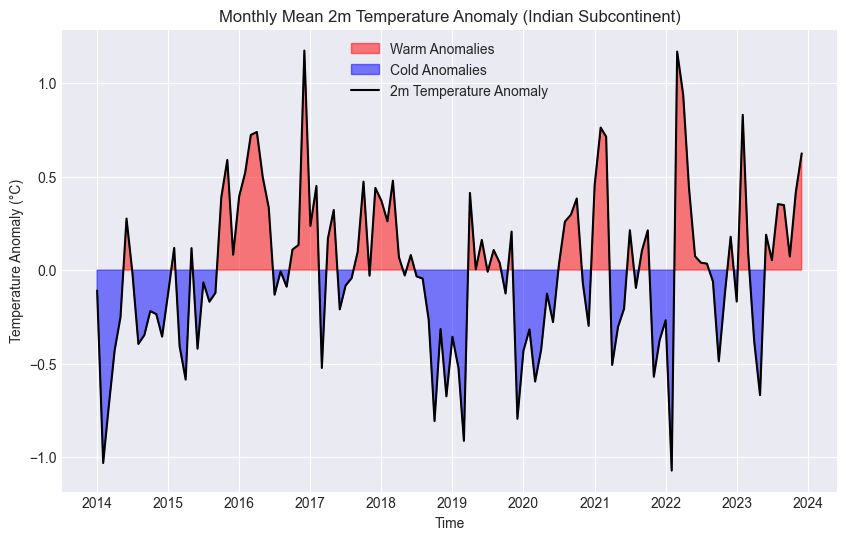

In [11]:
# Plotting the anomalies with color-filling
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis

# Plot warm anomalies (positive)
plt.fill_between(t2m_anomaly_mean['time'].values, t2m_anomaly_mean, where=(t2m_anomaly_mean >= 0),
                 interpolate=True, color='red', alpha=0.5, label='Warm Anomalies')

# Plot cold anomalies (negative)
plt.fill_between(t2m_anomaly_mean['time'].values, t2m_anomaly_mean, where=(t2m_anomaly_mean < 0),
                 interpolate=True, color='blue', alpha=0.5, label='Cold Anomalies')

# Plot the actual anomaly curve
t2m_anomaly_mean.plot(ax=ax, color='black', label='2m Temperature Anomaly')

# Add labels, title, and legend
plt.title('Monthly Mean 2m Temperature Anomaly (Indian Subcontinent)')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend(loc='upper center')

# Save the plot as an image file
plt.savefig('t2m_anomaly_plot.png')

# Show the plot
plt.show()

To make the plot more visually appealing, I have distinguished the anomalies as Warm anomalies (in red) and Cold anomalies (in blue) using the `plt.fill_between()` function. 

The analysis of the monthly mean temperature anomalies, calculated using the climatological mean for each month across multiple years, reveals varying temperature deviations over the study period from 2014 to 2023. The anomalies fluctuate both positively and negatively, indicating periods of warmer and cooler conditions compared to the climatological baseline. For much of the dataset, temperature deviations are within a small range, though there are several notable warm and cold spells. For instance, positive anomalies are evident during several months, particularly between 2017 and 2019, with some months experiencing anomalies exceeding 0.7°C, suggesting warmer-than-average conditions during these periods. 

Conversely, there are also prolonged cold periods, especially in early 2015 and late 2023, where the anomalies reach around -1.07°C, indicating cooler-than-normal conditions. The pattern is generally characterized by smaller fluctuations in recent years, with some months alternating between warm and cold anomalies. The transitions suggest a dynamic climate over the study region, with temperature deviations that both exceed and fall below the climatological average at various times during the decade. The report highlights the variability in surface temperatures, reflecting broader regional climate shifts over this period.

Once again, these results are from the perspective of monthly climatological mean during 2014-2023. Though some parts of the anomaly result align with reported warming for 2016 and 2023, they essentially differ from official reports. (The official reports of IMD have used the Long-Period Average (LPA) for 1991-2020. Prior to 2020, LPA for 1961-1990 was being used.) By using the 2014-2023 climatological mean, we focus on the temperature variations within the most recent decade, which may capture different warming or cooling trends compared to longer-term baselines (e.g., the LPA 1991-2020 used by IMD). This shorter baseline may emphasize more recent climate shifts, potentially underestimating longer-term climate variability.

#### Time-series Decomposition

Time-series decomposition is a statistical technique for analyzing time-series data by breaking it down into its fundamental components. This process helps identify underlying patterns and trends, making the data easier to understand and improving forecasting accuracy.

**Components of Time-Series Decomposition** (4, 5)

Time-series data can generally be decomposed into three main components:
1. Trend: This component reflects the series' long-term progression, indicating whether the data is increasing, decreasing, or remaining constant over time. The trend does not have to be linear and can vary in complexity.
2. Seasonality: This represents the repeating fluctuations in the data that occur at regular intervals, such as daily, monthly, or yearly patterns. Seasonal effects are predictable and usually tied to specific time periods (e.g., holiday seasons)
3. Residual (or Noise): This component captures random variability that cannot be attributed to the trend or seasonality. It represents the irregular influences on the time series, often seen as "white noise".

**Types of Decomposition Models**

There are two primary models for time-series decomposition:
1. Additive Model: In this model, the time series is expressed as the sum of its components, $$y_t = T_t + S_t + I_t$$

This approach is suitable when seasonal variations are relatively constant over time.

2. Multiplicative Model: Here, the time series is expressed as the product of its components, $$y_t = T_t \times S_t \times I_t$$

This model is appropriate when seasonal variations change proportionally with the level of the time series.

Let's decompose the 2m temperature timeseries! The `seasonal_decompose` module from `statsmodels` will help accomplish this step. 

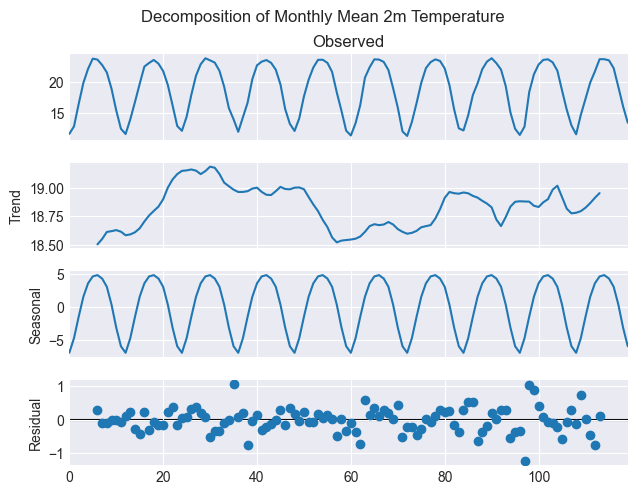

In [12]:
# Time-series decomposition of 2-m air temperature

# Area average across all months
temp_C_monmean = temp_C.mean(dim=['latitude', 'longitude'])

# Perform time series decomposition for t2m (temperature), CDD, and HDD
decompose_t2m = seasonal_decompose(temp_C_monmean, model='additive', period =12)  # monthly data, period=12

# Plotting decomposed data automatically
decompose_t2m.plot()
plt.suptitle("Decomposition of Monthly Mean 2m Temperature", y=1.02)  # Add a title above all subplots

# Save the plot as an image file
plt.savefig('t2m_timeseries_decompose.png')

plt.show()

The additive time series decomposition of the temperature data reveals three components: trend, seasonal, and residual. 

The **trend** component shows the long-term changes in temperature over time. The temperature rose steadily from early 2014, peaking around 2018–2019 with fluctuations in certain periods and showing some stability in the later years. This suggests a general warming pattern but with periods of slight cooling or stabilization around 2020.

The **seasonal** component captures the recurring patterns that occur each year, reflecting natural climate cycles. The data reveals a strong seasonal variation, with clear peaks and troughs occurring consistently each year. The highest seasonal temperatures are observed during the middle of the year (around June), while the lowest occur around January. These cycles represent the typical variation in temperature between the summer and winter months.

Given that the seasonal variations in the temperature data appear to be relatively constant over time, the additive model appear to be appropriate choice. While the additive model captures the trend and seasonal components well, it may not fully capture more complex interactions between temperature and climate drivers, such as non-linear responses to extreme weather events or large-scale climate anomalies.

Finally, the **residual** component, which represents the random fluctuations that are not explained by the trend or seasonal patterns, shows some variability over time. There are notable spikes in both positive and negative directions, indicating that short-term anomalies are present throughout the dataset. The residuals are more pronounced in certain periods, such as early 2016 and late 2023, suggesting unusual temperature deviations during these months, possibly due to specific weather events or localized climate anomalies. Together, all three components provide a comprehensive view of the temperature variations, with a clear upward trend and significant seasonal fluctuations punctuated by irregular, unpredictable events.


#### Spatial Plotting

In the context of climate data analysis, spatial data plots play a vital role in understanding and identifying significant regional changes. They provide a powerful tool for visualizing, analyzing, and communicating complex spatial dynamics and help pinpoint areas that may be more vulnerable to climate change impacts. This is essential for climate risk analysis, as it helps to identify areas that may require adaptive measures to mitigate the effects of these extremes.

In Python, we can plot spatial data using the `matplotlib` and `cartopy` modules. `matplotlib provides basic plotting functionality, while `cartopy` offers additional tools for handling and visualizing geospatial data, such as adding map projections and geographic features like coastlines and borders.

First, I will calculate the decadal mean for each month (group by 'time.month' and average across years). With this, spatial plots for each month can be plotted. This will give 12 plots, 1 for each month. Alternatively, we can plot the mean across all months.

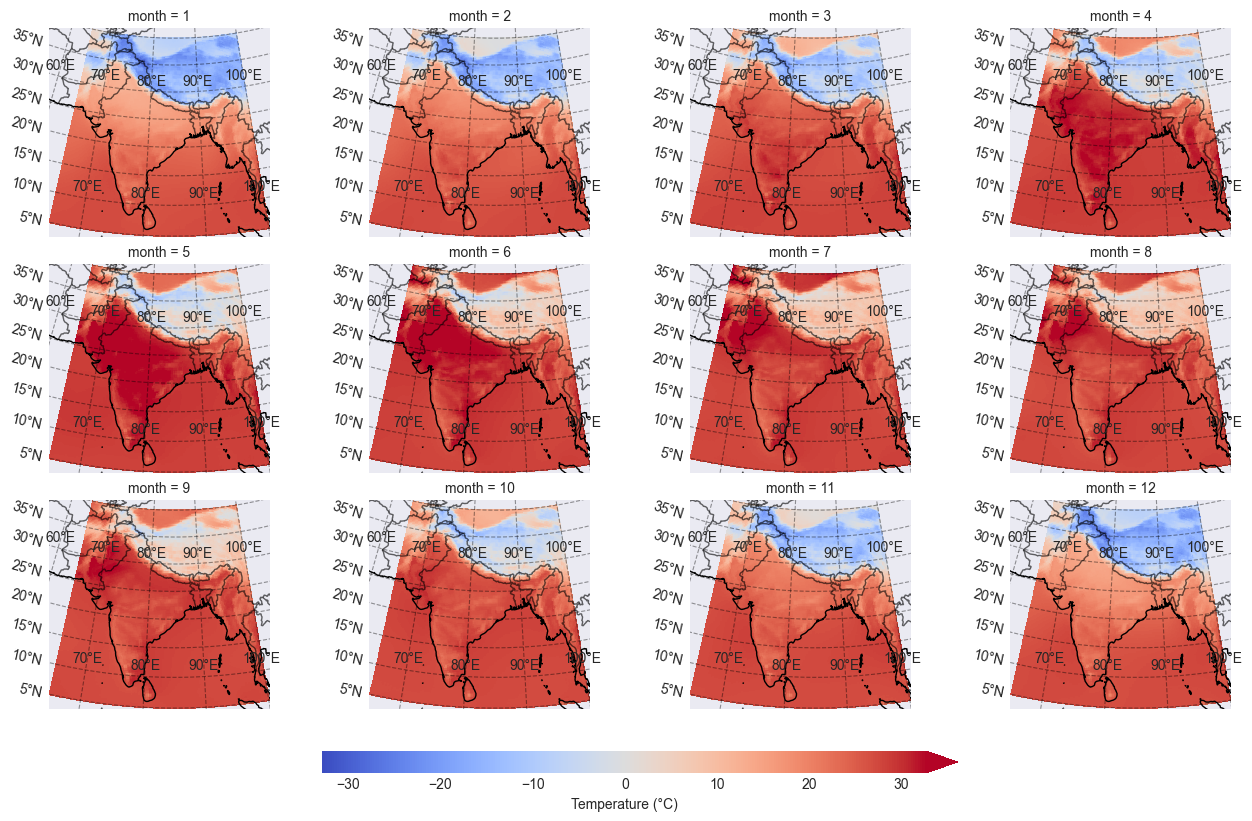

In [13]:
# Decadal mean of temperature (t2m) for each month (2014-2023)
temp_C_decadal_mean = temp_C.groupby('time.month').mean(dim='time')

# Step 2: Plot the decadal mean for all 12 months
fg = temp_C_decadal_mean.isel(month=np.arange(12)).plot(
    col="month",                   # Specify that plots are separate for each month
    col_wrap=4,                    # Wrap into 4 columns, so 4x3 grid for 12 months
    transform=ccrs.PlateCarree(),  # Use PlateCarree projection for transforming coordinates
    subplot_kws={"projection": ccrs.LambertConformal(central_longitude=85, central_latitude=20)},
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5, "aspect": 30, "pad": 0.05, "label": 'Temperature (°C)'},
    cmap = 'coolwarm',
    robust=True,                   # Automatically choose color limits to exclude outliers
)

# Add a coastline to each subplot
fg.map(lambda: plt.gca().coastlines())
    
# Add gridlines and titles
for ax in fg.axs.flat:
    gl = ax.gridlines(draw_labels=True, x_inline=True, color='black', alpha=0.4, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.6)

# Save the plot as an image file
plt.savefig('t2m_panel_spatial.png')

# Show the plot
plt.show()

As we can see, features from `cartopy` and plotting functions from `matplotlib` have come together beautifully to generate a spatial plot of decadal mean monthly temperatures in the Subcontinent during 2014-2023. There are endless ways to modify it, such as changing the spatial extent, the map projection, the color palette, temporal resolution, labels, and so on. 

From the spatial plots, it is evident that temperatures are generally higher in the Deccan plateau and north-western India during the summer months (April to June), while the northern regions experience cooler temperatures in the winter months (December to February). So, we have successfully visualized the regional variation of temperature in the Subcontinent with the decadal monthly mean temperature.

Things are going great! However, I will continue the fun in the next project as I have fulfilled the purpose of this project.

# Conclusion

This project has explored temperature variations over the Indian Subcontinent through timeseries and spatial analysis, providing an understanding of both temporal and regional climate patterns. In the next project, I will use the same `t2m` data for more complex analyses, such as projecting temperature using a simple model and incorporating temperature indices to better assess regional climate risks and inform mitigation strategies.

# Reference

1. Kalyan Ray. (2024, January 1). <https://www.deccanherald.com/india/imd-says-2023-was-second-warmest-year-for-india-since-1901-2831841>
2. TWC India. (2024, January 3). The Weather Channel. <https://weather.com/en-IN/india/news/news/2024-01-03-2023-was-indias-second-warmest-year-since-1901-due-to-el-nino>
3. Kiran Pandey & Rajit Sengupta. (2024, May 31). Down to Earth. <https://www.downtoearth.org.in/climate-change/india-is-warming-fast-endured-its-2nd-hottest-year-on-record-last-year-state-of-environment-in-figures-2024>
4. GeeksforGeeks. (2023, October 20). Time Series Decomposition Techniques. <https://www.geeksforgeeks.org/time-series-decomposition-techniques/>
5. Rob Hyndman & George Athanasopoulos. (2021). Chapter 3 Time series decomposition. Forecasting: Principles and Practice (3rd ed). <https://otexts.com/fpp3/decomposition.html>